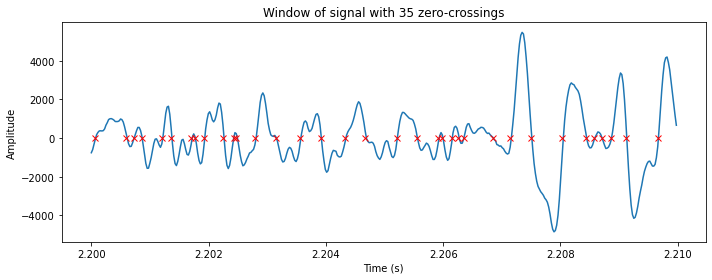

In [1]:
# static example of zero-crossing
from ipywidgets import *
import IPython.display as ipd
from ipywidgets import interactive
import numpy as np
import scipy
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

filename = 'sounds/test.wav'
fs, data = wavfile.read(filename)
data = data.astype(np.int16)
data = data[:]
data_length = int(len(data))

window_length_ms = 10
window_length = int(window_length_ms*fs/1000.)
t = np.arange(0,data_length)/fs

# Hann window
window_function = np.sin(np.pi*np.arange(.5/window_length,1,1/window_length))**2 

window_position = int(2.2*fs)
if window_position > data_length-window_length: 
    window_position = data_length-window_length

ix = window_position + np.arange(0,window_length,1)
zcr = np.sum(np.abs(np.diff(np.sign(data[ix]),axis=0)),axis=0)//2
zcr_vec = np.abs(np.diff(np.sign(data[ix]),axis=0))
zcr_idx = np.where(zcr_vec > 0)

fig = plt.figure(figsize=(10, 4))
plt.plot(t[ix],data[ix])
plt.plot(t[ix[zcr_idx]],0*data[ix[zcr_idx]],'rx')
plt.title('Window of signal with ' +str(zcr) + ' zero-crossings')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


In [2]:
# interactive example of spectrum
from ipywidgets import *
import IPython.display as ipd
from ipywidgets import interactive
import numpy as np
import scipy
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

filename = 'sounds/test.wav'
fs, data = wavfile.read(filename)
data = data.astype(np.int16)
data = data[:]
data_length = int(len(data))


def update(position_s=0.5*data_length/fs,window_length_ms=10.0):
    ipd.clear_output(wait=True)
    window_length = int(window_length_ms*fs/1000.)
    t = np.arange(0,data_length)/fs
    
    # Hann window
    window_function = np.sin(np.pi*np.arange(.5/window_length,1,1/window_length))**2 
    
    window_position = int(position_s*fs)
    if window_position > data_length-window_length: 
        window_position = data_length-window_length
       
    ix = window_position + np.arange(0,window_length,1)
    zcr = np.sum(np.abs(np.diff(np.sign(data[ix]),axis=0)),axis=0)//2
    zcr_vec = np.abs(np.diff(np.sign(data[ix]),axis=0))
    zcr_idx = np.where(zcr_vec > 0)
    
    fig = plt.figure(figsize=(10, 8))
    #ax = fig.subplots(nrows=1,ncols=1)
    plt.subplot(211)
    plt.plot(t,data)
    plt.plot([position_s, position_s],[np.min(data), np.max(data)],'r--')
    plt.title('Whole signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.subplot(212)
    plt.plot(t[ix],data[ix])
    plt.plot(t[ix[zcr_idx]],0*data[ix[zcr_idx]],'rx')
    plt.title('Selected window signal with ' +str(zcr) + ' zero-crossings')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    fig.canvas.draw()
        
    


interactive_plot = interactive(update, 
                               #positions_s=widgets.FloatSlider(min=0., max=(data_length-window_length)/fs, value=1., step=0.01,layout=Layout(width='1500px')),
                               position_s=(0., data_length/fs,0.001),
                               window_length_ms=(2.0, 30.0, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '600px'
style = {'description_width':'120px'}
interactive_plot.children[0].layout = Layout(width='760px')
interactive_plot.children[1].layout = Layout(width='760px')
interactive_plot.children[0].style=style
interactive_plot.children[1].style=style
interactive_plot


interactive(children=(FloatSlider(value=1.4048072562358276, description='position_s', layout=Layout(width='760…

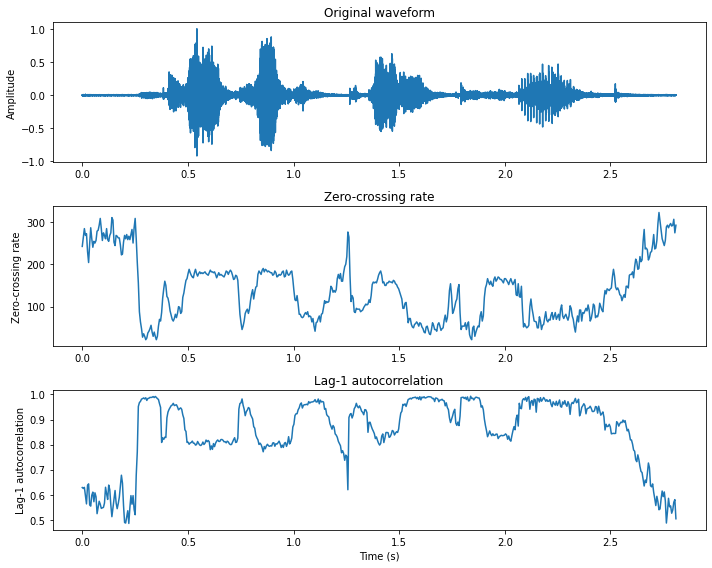

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile


# read from storage
filename = 'sounds/test.wav'
fs, data = wavfile.read(filename)
data = np.float64(data)

# window parameters in milliseconds
window_length_ms = 30
window_step_ms = 5

window_step = int(np.round(fs*window_step_ms/1000))
window_length = window_step*2
window_count = int(np.floor((data.shape[0]-window_length)/window_step)+1)


# Extract windows
window_matrix = np.zeros([window_length,window_count],dtype=np.float64)
for window_ix in range(window_count):    
    window_matrix[:,window_ix] = data[window_ix*window_step+np.arange(window_length)]
    

# Count zero crossings in each window
zcr = np.sum(np.abs(np.diff(np.sign(window_matrix),axis=0)),axis=0)

# Correlation lag-1
xcorr1 = np.mean(window_matrix[0:-2,:]*window_matrix[1:-1,:],axis=0)/np.mean(window_matrix**2,axis=0)

plt.figure(figsize=[10,8])

t = np.linspace(0,len(data)/fs,len(data))
plt.subplot(311)
plt.plot(t,data/np.max(np.abs(data)))
plt.ylabel('Amplitude')
plt.title('Original waveform')

t = np.linspace(0,len(data)/fs,window_count)
plt.subplot(312)
plt.plot(t,zcr)
plt.ylabel('Zero-crossing rate')
plt.title('Zero-crossing rate')

plt.subplot(313)
plt.plot(t,xcorr1)
plt.xlabel('Time (s)')
plt.ylabel('Lag-1 autocorrelation')
plt.title('Lag-1 autocorrelation')

plt.tight_layout()
plt.show()